<a href="https://colab.research.google.com/github/nithingowrav/NitmansRrep/blob/master/Persian_audio_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import librosa

In [0]:
audio_path='/content/sample_data/Persian_audio/clips/common_voice_fa_18202375.mp3'

In [0]:
y, sr = librosa.load(audio_path)

array([ 2.1920941e-07, -2.4629907e-07,  2.6953737e-07, ...,
       -6.9711264e-06, -9.7101201e-06,  0.0000000e+00], dtype=float32)

In [0]:
sr

22050

In [0]:
import IPython.display as ipd
ipd.Audio(audio_path)

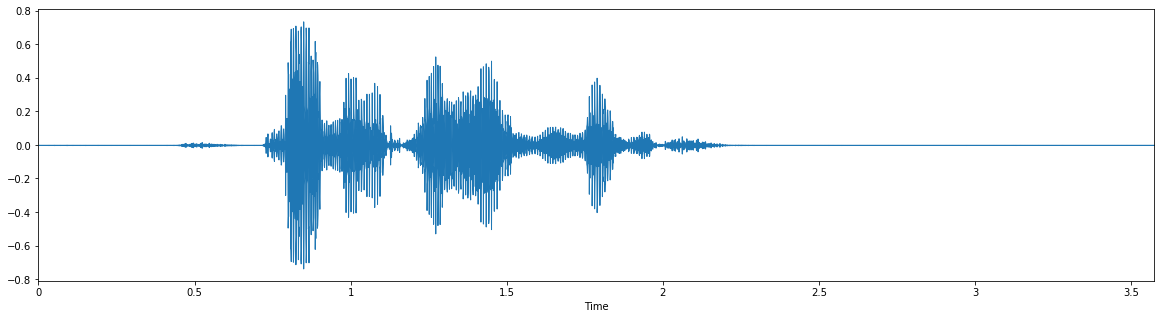

In [0]:
%matplotlib inline
import sklearn
import matplotlib.pyplot as plt
import librosa.display

plt.figure(figsize=(20, 5))
librosa.display.waveplot(y, sr=sr)

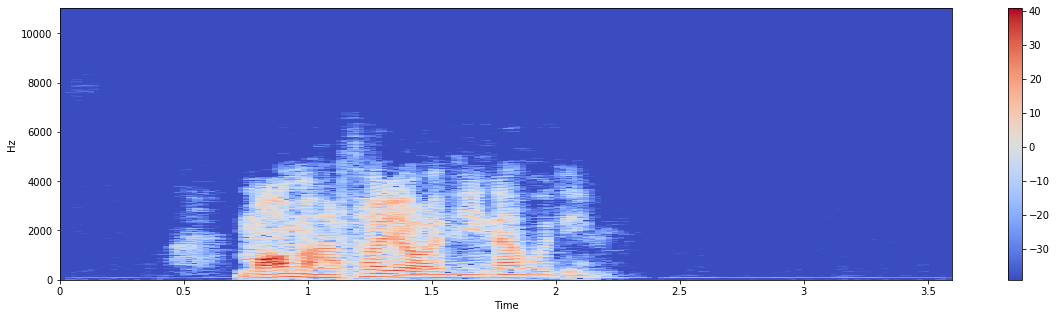

In [0]:

X = librosa.stft(y)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(20, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

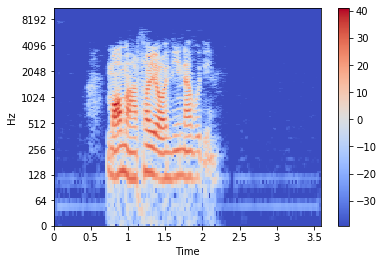

In [0]:

librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

In [0]:
import numpy as np
sr = 22050 # sample rate
T = 5.0    # seconds
t = np.linspace(0, T, int(T*sr), endpoint=False) # time variable
x = 0.5*np.sin(2*np.pi*220*t)# pure sine wave at 220 Hz

In [0]:
ipd.Audio(x, rate=sr) # load a NumPy array

In [0]:
import nltk

In [0]:
import IPython.display as ipd  # To play sound in the notebook
fname = '/content/sample_data/Persian_audio/clips/common_voice_fa_18202375.mp3'   # Hi-hat
ipd.Audio(fname)

In [0]:
!pip install speechrecognition

     |████████████████████████████████| 32.8MB 24.3MB/s 


In [0]:
!pip install pyaudio

  ERROR: Failed building wheel for pyaudio
  Running setup.py clean for pyaudio
Failed to build pyaudio
    Running setup.py install for pyaudio ... error
ERROR: Command errored out with exit status 1: /usr/bin/python3 -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-0i6y8c69/pyaudio/setup.py'"'"'; __file__='"'"'/tmp/pip-install-0i6y8c69/pyaudio/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' install --record /tmp/pip-record-f6uswnox/install-record.txt --single-version-externally-managed --compile Check the logs for full command output.


In [0]:
librosa.output.write_wav('/content/tone_440.wav', x, sr) # writing wave file in tone440.wav format

In [0]:
import numpy as np
np.random.seed(1001)

import os
import shutil

import IPython
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from tqdm import tqdm_notebook
from sklearn.model_selection import StratifiedKFold


%matplotlib inline
matplotlib.style.use('ggplot')

In [0]:
tsv_file='/content/drive/My Drive/Persian_audio/train.tsv'
csv_table=pd.read_table(tsv_file,sep='\t')
csv_table.to_csv('/content/drive/My Drive/Persian_audio/train.csv',index=False)


In [0]:

tsv_test_file='/content/drive/My Drive/Persian_audio/test.tsv'
csv_table2=pd.read_table(tsv_test_file,sep='\t')
csv_table2.to_csv('/content/drive/My Drive/Persian_audio/test.csv',index=False)

In [0]:

train = pd.read_csv("/content/drive/My Drive/Persian_audio/train.csv")
test = pd.read_csv("/content/drive/My Drive/Persian_audio/test.csv")

In [6]:
train.head()


,client_id,path,sentence,up_votes,down_votes,age,gender,accent
0,dc7212e3267a67cb22f0eeecec68f0f8b9d7879bef1a87...,common_voice_fa_18613947.mp3,نام این کمپین در کاگب، نام داشت,2,0,twenties,female,NaN
1,dc7212e3267a67cb22f0eeecec68f0f8b9d7879bef1a87...,common_voice_fa_18613948.mp3,بنابراین، اولین باری است که فرصتی قوی در اختیا...,2,0,twenties,female,NaN
2,dc7212e3267a67cb22f0eeecec68f0f8b9d7879bef1a87...,common_voice_fa_18613950.mp3,هوا تاریک بود و نسبتا سرد,2,0,twenties,female,NaN
3,dc7212e3267a67cb22f0eeecec68f0f8b9d7879bef1a87...,common_voice_fa_18614031.mp3,این چه حرفیه؟ چرا تهمت میزنی؟,2,0,twenties,female,NaN
4,dc7212e3267a67cb22f0eeecec68f0f8b9d7879bef1a87...,common_voice_fa_18614184.mp3,چون ما درباره خود و دیگران الگوهای شناختی ایجا...,2,0,twenties,female,NaN


In [0]:

print("Number of training examples=", train.shape[0], "  Number of classes=", len(train.age.unique()))

Number of training examples= 2409   Number of classes= 6


In [0]:
print(train.age.unique())

['twenties' 'thirties' nan 'fourties' 'teens' 'fifties']


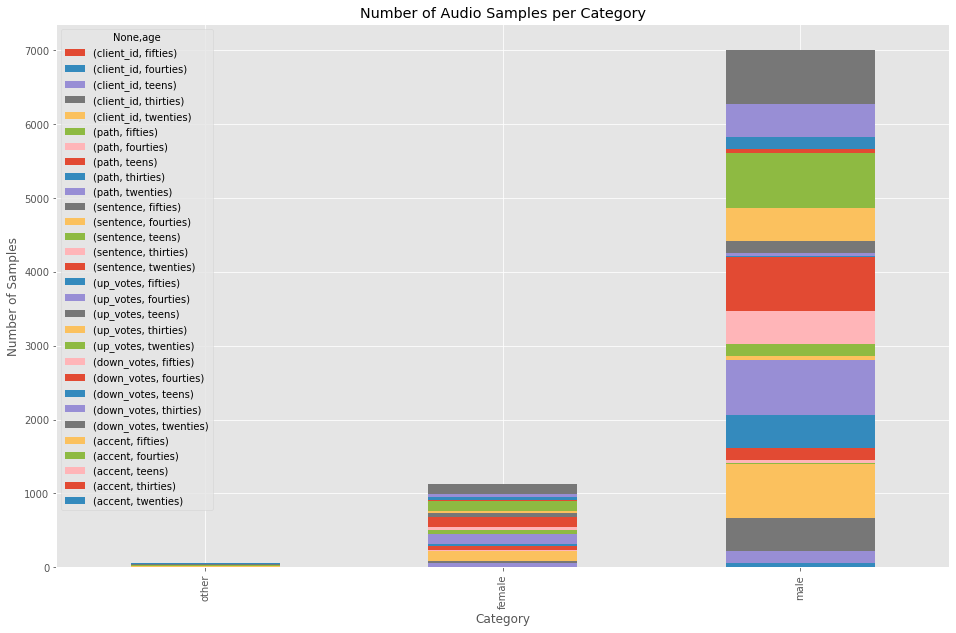

In [0]:
category_group = train.groupby(['gender', 'age']).count()
plot = category_group.unstack().reindex(category_group.unstack().sum(axis=1).sort_values().index)\
          .plot(kind='bar', stacked=True, title="Number of Audio Samples per Category", figsize=(16,10))
plot.set_xlabel("Category")
plot.set_ylabel("Number of Samples");

In [0]:
print('Minimum samples per category = ', min(train.age.value_counts()))
print('Maximum samples per category = ', max(train.age.value_counts()))

Minimum samples per category =  5
Maximum samples per category =  879


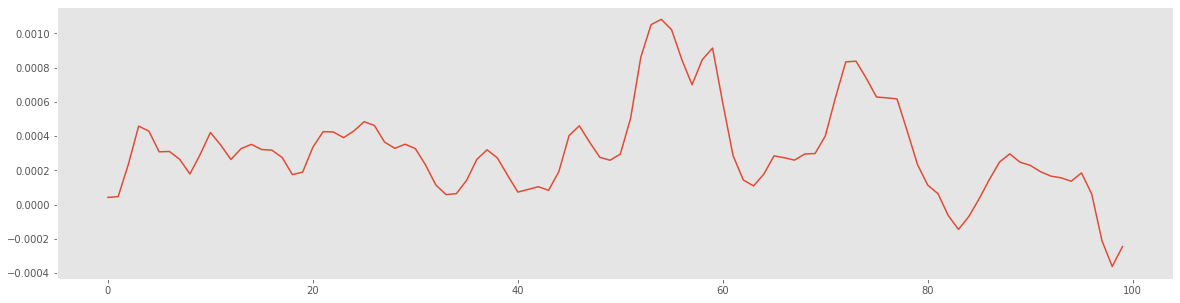

In [0]:
# Zooming in
n0 = 9000
n1 = 9100
plt.figure(figsize=(20, 5))
plt.plot(y[n0:n1])
plt.grid()

In [0]:
zero_crossings = librosa.zero_crossings(y[n0:n1], pad=False)
zero_crossings.shape

(100,)

In [0]:
print(sum(zero_crossings))

3


In [0]:
spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
spectral_centroids.shape

(216,)

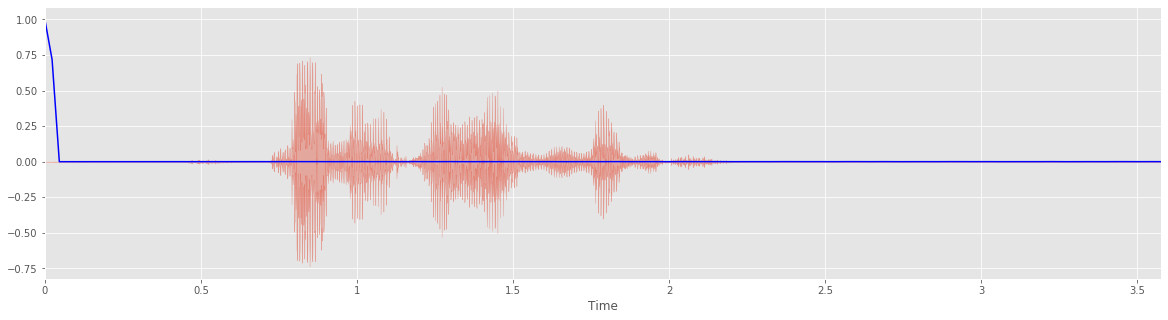

In [0]:
# Computing the time variable for visualization
plt.figure(figsize=(20,5))
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)

# Normalising the spectral centroid for visualisation
def normalize(y, axis=0):
    return sklearn.preprocessing.minmax_scale(y, axis=axis)

#Plotting the Spectral Centroid along the waveform
librosa.display.waveplot(y, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='b')

In [14]:
!pip install pydub

In [0]:
os.chdir('/content/drive/My Drive/Persian_audio/clips')

In [0]:
mp3_list=os.listdir()

In [0]:
from pydub import AudioSegment

In [0]:
for i in mp3_list:
  src = i
  dst = '/content/drive/My Drive/Persian_audio/wav_cnvrtd_src/'+os.path.splitext(i)[0]+'.wav'

  # convert wav to mp3                                                            
  sound = AudioSegment.from_mp3(src)
  sound.export(dst, format="wav")

In [0]:
from os import path
from pydub import AudioSegment

# files                                                                        
src = fname
dst = "/content/sample_data/Persian_audio/clips/common_voice_fa_18202375.wav"

# convert wav to mp3                                                            
sound = AudioSegment.from_mp3(src)
sound.export(dst, format="wav")

<_io.BufferedRandom name='/content/sample_data/Persian_audio/clips/common_voice_fa_18202375.wav'>

In [0]:
fname='/content/sample_data/Persian_audio/clips/common_voice_fa_18202375.wav'

In [0]:
# Using wave library
import wave
wav = wave.open(fname)
print("Sampling (frame) rate = ", wav.getframerate())
print("Total samples (frames) = ", wav.getnframes())
print("Duration = ", wav.getnframes()/wav.getframerate())

Sampling (frame) rate =  48000
Total samples (frames) =  171648
Duration =  3.576


In [0]:
# Using scipy
from scipy.io import wavfile
rate, data = wavfile.read(fname)
print("Sampling (frame) rate = ", rate)
print("Total samples (frames) = ", data.shape)
print(data)

Sampling (frame) rate =  48000
Total samples (frames) =  (171648,)
[0 0 0 ... 0 0 0]


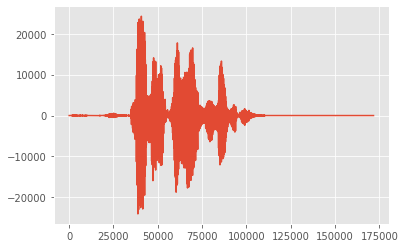

In [0]:
plt.plot(data, '-', );

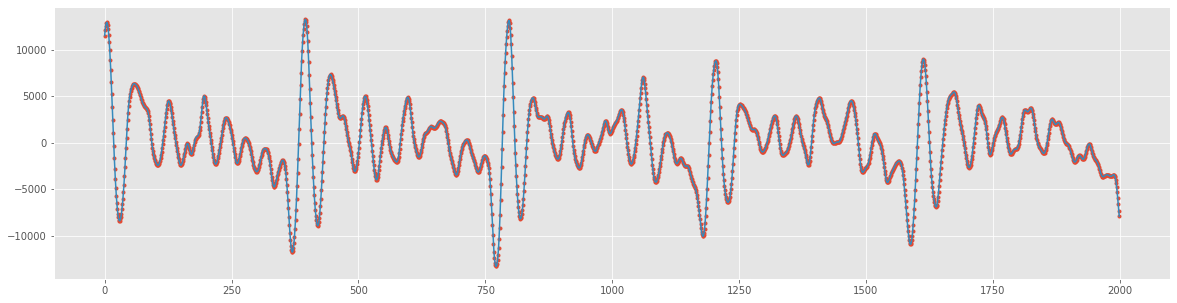

In [0]:
plt.figure(figsize=(20, 5))
plt.plot(data[48000:50000], '.'); plt.plot(data[48000:50000], '-');

In [0]:
train["path"].str.split(".", 1).str[0]

0       common_voice_fa_18613947
1       common_voice_fa_18613948
2       common_voice_fa_18613950
3       common_voice_fa_18614031
4       common_voice_fa_18614184
                  ...           
2404    common_voice_fa_18232677
2405    common_voice_fa_18232689
2406    common_voice_fa_18770865
2407    common_voice_fa_18552644
2408    common_voice_fa_18609824
Name: path, Length: 2409, dtype: object

In [0]:
train['wavname']=train["path"].str.split(".", 1).str[0]+'.wav'

In [0]:
test['wavname']=test["path"].str.split(".", 1).str[0]+'.wav'

In [0]:
test.head()

,client_id,path,sentence,up_votes,down_votes,age,gender,accent,wavname
0,016099f3eca09d2769a4bcbef9d90cb9742b9b2bf2b6ad...,common_voice_fa_18325365.mp3,از مهمونداری کنار بکشم,2,1,NaN,NaN,NaN,common_voice_fa_18325365.wav
1,134a81fa8be98f84ff96f39f37bce55c9d91d96d66dd8b...,common_voice_fa_18557643.mp3,دو استایل متفاوت دارین,2,1,NaN,NaN,NaN,common_voice_fa_18557643.wav
2,1dd260abce53b5c0f3bc50e2653ec509686c285e93b625...,common_voice_fa_18524427.mp3,دوست نداره، گفته بودم بهتون ببخشید. عذر می خوا...,2,1,fourties,other,NaN,common_voice_fa_18524427.wav
3,1f660d2c0653aa4dd933cc1977f17ddbd9710df47133a8...,common_voice_fa_18636711.mp3,ما با هم خیلی مچ هستیم,2,1,thirties,male,NaN,common_voice_fa_18636711.wav
4,28b84bbd648000da5590fe180278e65dff28e5318e8438...,common_voice_fa_18594915.mp3,اما سرآخر، وا دادند,2,0,fourties,male,NaN,common_voice_fa_18594915.wav


In [0]:
for i in mp3_list:
  src = i
  dst = '/content/sample_data/Persian_audio/clips/wav_src/'+os.path.splitext(i)[0]+'.wav'

  # convert wav to mp3                                                            
  sound = AudioSegment.from_mp3(src)
  sound.export(dst, format="wav")

In [0]:
train['nframes'] = train['wavname'].apply(lambda f: wave.open('/content/sample_data/Persian_audio/clips/wav_src/' + f).getnframes())
test['nframes'] = test['wavname'].apply(lambda f: wave.open('/content/sample_data/Persian_audio/clips/wav_src/' + f).getnframes())

_, ax = plt.subplots(figsize=(16, 4))
sns.violinplot(ax=ax, x="age", y="nframes", data=train)
plt.xticks(rotation=90)
plt.title('Distribution of audio frames, per agegroup', fontsize=16)
plt.show()

FileNotFoundError: ignored

In [0]:
from collections import defaultdict

In [0]:
defaultdict(list)

defaultdict(list, {})

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive
